# Maier dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
graph = Graph_MCMC()
graph.read_from_ns("facebook_friends")
graph.convert_props_to_flags()
graph.add_ego_node()

In [3]:
graph.print_info()

Graph with N=363 nodes, E=2350 edges and D=32 vertex features for training


In [4]:
graph.partition(B_min=6, B_max=6)

Performing inference...
Current bracket: (6, 6, 6) (5795.563877969811, 5795.563877969811, 5795.563877969811)
Current bracket: (6, 6, 6) (5795.563877969811, 5795.563877969811, 5795.563877969811)
Bisect at B = 6 with S = 5795.563877969811
Best result: B = 6, S = 5795.563877969811
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f64f42e37f0, at 0x7f648151a6d0>

In [5]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1778.17it/s]


6

Drawing soft partition


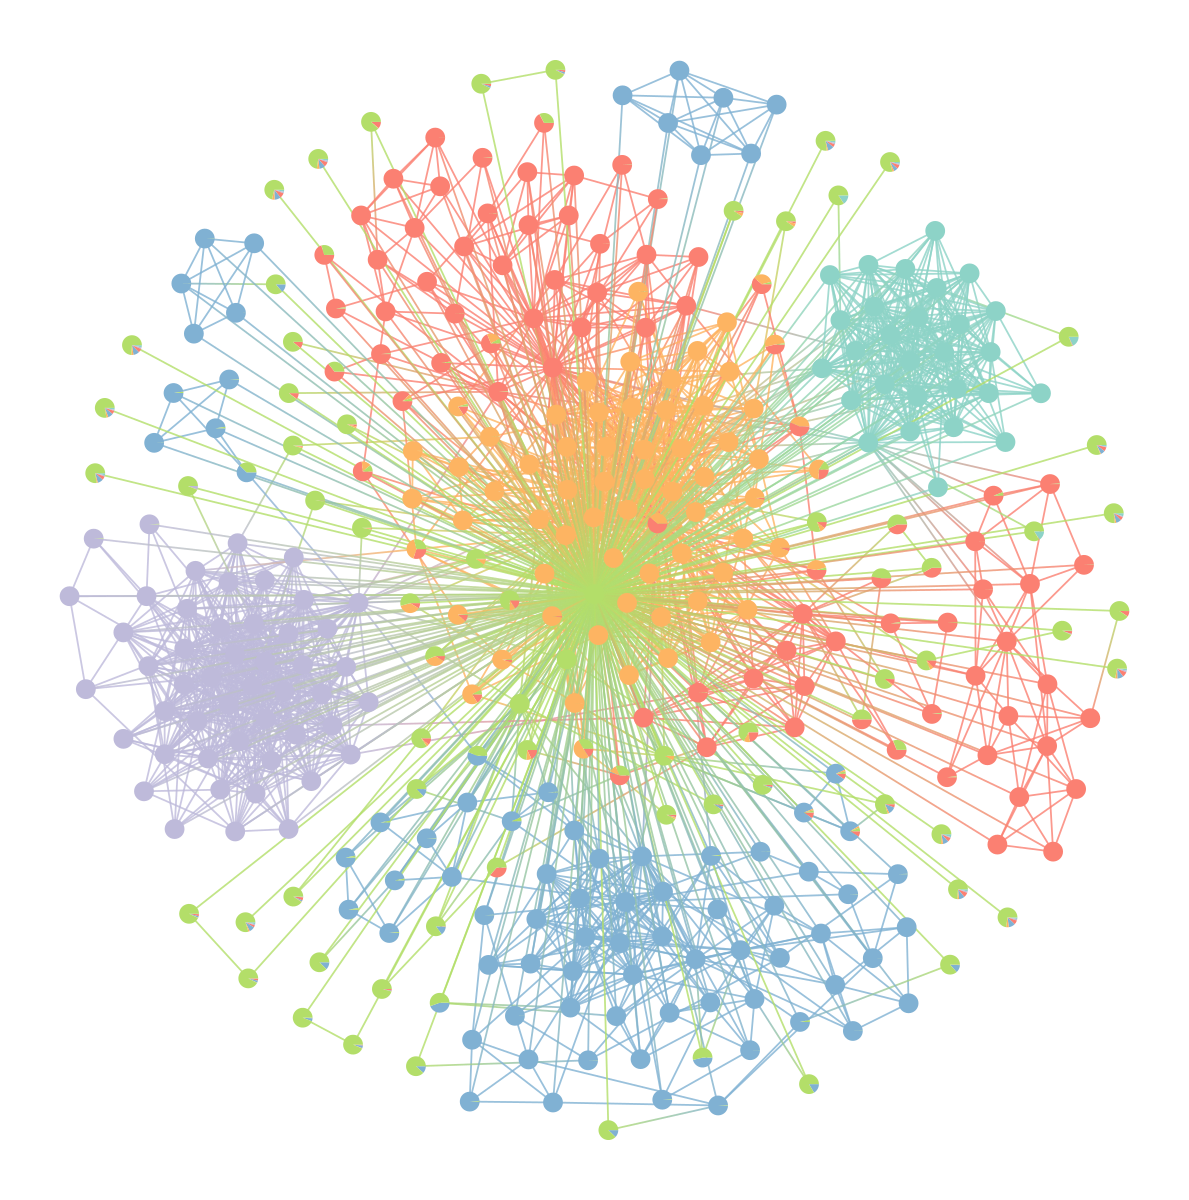

In [6]:
graph.draw(gen_layout=True)

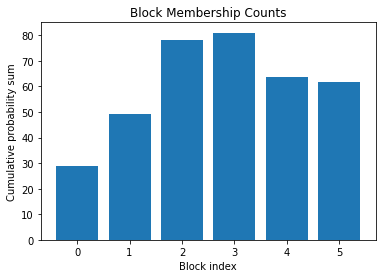

In [7]:
graph.plot_posterior_props()

## Train classifier

In [8]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 982.21it/s]Sample accept ratio: 87.81%
Train. set accuracy: 53.4435261707989%



## Interpret results

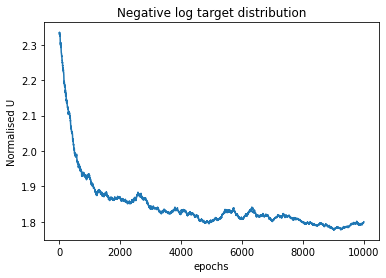

1.8462086659230903

In [9]:
classifier.plot_U()

In [10]:
classifier.thin_samples()

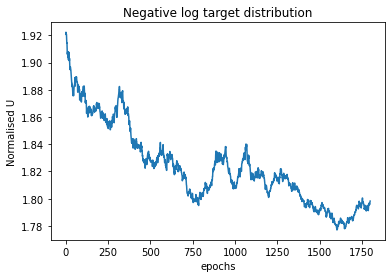

1.823775178286049

In [11]:
classifier.plot_U()

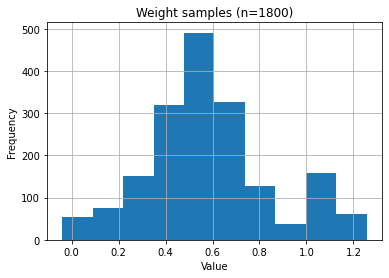

In [12]:
classifier.plot_sample_histogram()

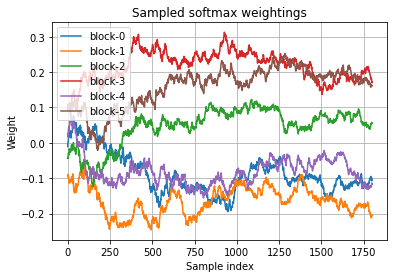

In [13]:
classifier.plot_sample_history()

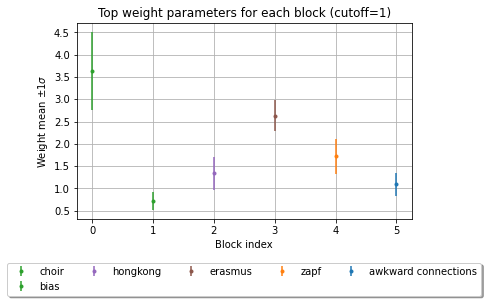

In [14]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 0: awkward connections
Discarding feature 1: barcelona
Discarding feature 3: climbing
Discarding feature 4: dortmund
Discarding feature 6: exgf
Discarding feature 8: family friend
Discarding feature 9: french class
Discarding feature 10: friend of exgf
Discarding feature 11: friend of friend
Discarding feature 12: gf
Discarding feature 13: hong kong
Discarding feature 14: hongkong
Discarding feature 15: mentoring
Discarding feature 16: munich
Discarding feature 17: physics conference
Discarding feature 18: quitte
Discarding feature 19: random
Discarding feature 20: reddit
Discarding feature 21: school
Discarding feature 22: studienstiftung
Discarding feature 23: uni
Discarding feature 24: xrays
Discarding feature 25: acquaintance
Discarding feature 26: friend
Discarding feature 27: grad school
Discarding feature 28: rap
Discarding feature 29: sailing
Discarding feature 30: supervisor
Discarding feature 32: bias


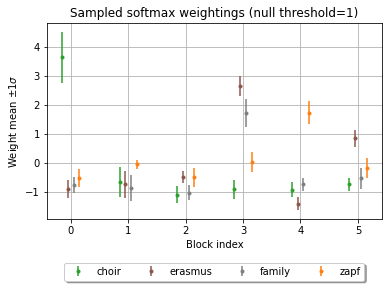

In [15]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)